<a href="https://colab.research.google.com/github/daehkim/Pytorch_collabs/blob/main/CNN_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torch.nn import functional as F
import torchvision
from torchvision import datasets,transforms
import torchvision.transforms as transforms
import torchvision.models as models
import math

In [3]:
train_dataset = torchvision.datasets.CIFAR10('classifier_data', train=True, download=True)
test_dataset  = torchvision.datasets.CIFAR10('classifier_data', train=False, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting classifier_data/cifar-10-python.tar.gz to classifier_data
Files already downloaded and verified


In [124]:
train_dataset.transoform=transform
test_dataset.transofrm=transform

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_dataset.transform=transform
test_dataset.transform=transform

m=len(train_dataset)

#random_split randomly split a dataset into non-overlapping new datasets of given lengths
train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])

batch_size=128

# The dataloaders handle shuffling, batching, etc...
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

print("Batches in Train Loader: {}".format(len(train_loader)))
print("Batches in Valid Loader: {}".format(len(valid_loader)))
print("Batches in Test Loader: {}".format(len(test_loader)))

print("Examples in Train Loader: {}".format(len(train_loader.sampler)))
print("Examples in Valid Loader: {}".format(len(valid_loader.sampler)))
print("Examples in Test Loader: {}".format(len(test_loader.sampler)))

Batches in Train Loader: 313
Batches in Valid Loader: 79
Batches in Test Loader: 79
Examples in Train Loader: 40000
Examples in Valid Loader: 10000
Examples in Test Loader: 10000


In [208]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(0)
model=models.vgg16(pretrained=True)
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [89]:
model_weights = [] 
conv_layers = [] 
model_layers = list(model.children())

# counter to keep count of the conv layers
counter = 0 
# append all the conv layers and their respective weights to the list
for model_children in model_layers:
    try:
        for i in range(len(model_children)):
            if type(model_children[i]) == nn.Conv2d:
                counter += 1
                model_weights.append(model_children[i].weight)
                conv_layers.append(model_children[i])
    except:
        if type(model_children) == nn.Conv2d:
            counter += 1
            model_weights.append(model_children.weight)
            conv_layers.append(model_children)
    
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 13


In [90]:
for weight, conv in zip(model_weights, conv_layers):
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 3, 3, 3])
CONV: Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 64, 3, 3])
CONV: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([128, 64, 3, 3])
CONV: Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([128, 128, 3, 3])
CONV: Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 128, 3, 3])
CONV: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 256, 3, 3])
CONV: Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([256, 256, 3, 3])
CONV: Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([512, 256, 3, 3])
CONV: Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAP

512 16 32


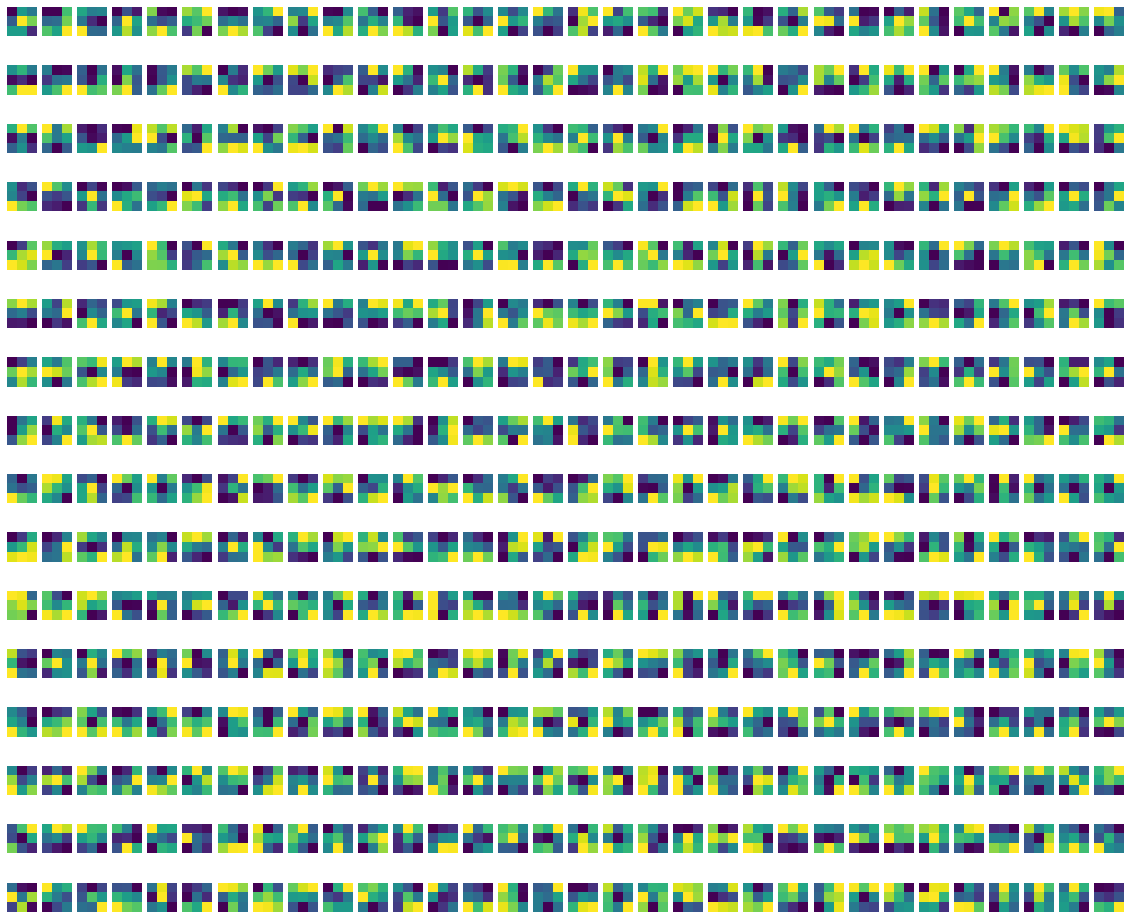

In [43]:
plt.figure(figsize=(20, 17))
weight_num = 10
filter_num = len(model_weights[weight_num])
weight_plot_x = int(2**int(math.log2(filter_num)/2))
weight_plot_y = int(filter_num/weight_plot_x)
print(filter_num, weight_plot_x, weight_plot_y)

for i, filter in enumerate(model_weights[weight_num]):
    plt.subplot(weight_plot_x, weight_plot_y, i+1)
    plt.imshow(filter[0, :, :].detach().cpu().numpy(), cmap='viridis')
    plt.axis('off')
plt.savefig('fig_weight_'+str(weight_num))
plt.show()

##Check the filter information

In [91]:
test = model_weights[weight_num].detach().numpy()
test = test*256
test = test.astype(int)
print(test)
print(np.sum(test))

[[[[ -7  -4  -5]
   [ -5  -2  -3]
   [ -4  -4  -6]]

  [[ -5  -6  -1]
   [ -3  -4  -4]
   [ -6  -2  -1]]

  [[ -1   0  -1]
   [  2   6   3]
   [ -2   0  -2]]

  ...

  [[  6   9   5]
   [ 11  13   8]
   [  9  11   9]]

  [[  6   2   5]
   [  0  -2   3]
   [  1  -2   6]]

  [[  4   2   4]
   [  6   2   6]
   [  2   1   0]]]


 [[[ -6  -6   0]
   [ -3  -3   0]
   [  0  -1   2]]

  [[  2   2   3]
   [  0   4   4]
   [ -3   0  -2]]

  [[ -2  -3  -2]
   [  0   3   2]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  6   6   0]
   [  7   7   1]]

  [[ -1   4   1]
   [ -3   2   0]
   [ -1   0  -2]]

  [[  8  14   2]
   [  2   9   2]
   [ -4  -3   0]]]


 [[[  5   4   4]
   [  3   1   0]
   [  8   3   3]]

  [[  2   2   0]
   [  5   3   1]
   [  0  -1  -2]]

  [[ -7  -7  -9]
   [ -6  -4  -6]
   [ -6  -7  -6]]

  ...

  [[ -2  -2   0]
   [ -2  -3  -1]
   [  0   0  -3]]

  [[ -1   0  -1]
   [ -4  -3  -2]
   [-10  -4  -4]]

  [[ -1  -9  -4]
   [  1 -11  -8]
   [  7  -1   1]]]


 ...


 [[[ -2   3 

## Check the feature-map information

In [209]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        #activation[name] = output.detach()
        #print(input)
        activation[name] = input[0].detach()
    return hook

features.14
max_layer_num: 13
(1, 256, 8, 8)
[ 0.          0.          2.1797755   0.          0.9744695   0.
  1.6604654   8.297152    0.          6.8057923   0.          0.
  0.12695467  0.          0.65121186  0.          0.          3.5402646
  7.5853057   8.452747    2.1953015   5.78104     0.          1.578456
  0.          3.358816    0.7153213   0.          6.3191886   4.9325027
  1.9616785   3.9440098   1.4608958   4.2425604   0.          2.5448403
  6.8886924   0.          0.          0.          4.463262    3.7027228
  0.          2.4111948   6.5785794   0.          5.455225    1.2900592
  2.1418004   6.9964004   6.055431    0.          0.          4.360676
  0.          0.          0.          0.          0.          0.
  3.1497052   1.300443    0.          0.          0.          2.1692052
  0.          0.          0.          0.781948    0.         23.014006
  6.689017    0.          0.          0.          4.3723416   0.
  5.9645376   0.          0.          0.          

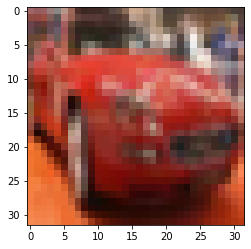

In [234]:
layer_num = 6
layer_name = ''
layer_name_list = []
data, _ = train_dataset[5]
data=data.to(device)
data.unsqueeze_(0)

# hook the layer
counter = 0
for child_name, child in model.named_modules():
    if type(child) == nn.Conv2d:
        layer_name_list.append(child_name)
        if counter == layer_num:
            print(child_name)
            child.register_forward_hook(get_activation(child_name))
        counter += 1

print('max_layer_num:', counter)

output = model(data)


target_activation = activation[layer_name_list[layer_num]]
np_target_act = target_activation.detach().numpy()
#np_target_act = np_target_act*256
#np_target_act = np_target_act.astype(int)
print(np_target_act.shape)
print(np_target_act[0, :, 0, 0])

#target_act_sum = np.sum(np_target_act, axis=1)
#print(target_act_sum.shape)
#print(target_act_sum)
plt.imshow(data[0].permute(1, 2, 0))